In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!source /content/drive/MyDrive/colab_env/bin/activate;

In [3]:
import sys
sys.path.append('/content/drive/MyDrive/colab_env/lib/python3.10/site-packages')

In [4]:
import numpy as np
import nltk

In [5]:
from nltk import pos_tag, regexp_tokenize, corpus, stem

In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef

In [7]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [9]:
import pickle
import joblib

In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
#create variable holding file path
file_path = "/content/drive/MyDrive/MSc Data Science & Artificial Intelligence/2nd Semester/CIS4515 Practical Data Analysis/CW2/reviews_Apps_for_Android_5.test.txt"

In [14]:
#Import data from file path into a pandas dataframe called 'df'
df = pd.read_csv(file_path, sep='\t', header=None, names=['rating', 'app', 'review'])

In [15]:
#Show top 5 reviews in df
df.head(5)

,rating,app,review
0,3,B004K4RY9M,I am a person who has always enjoyed word game...
1,3,B004K4RY9M,Love this. I try to beat my own time to see h...
2,3,B004K4RY9M,This game is fun and it can also be alearning ...
3,3,B004K4RY9M,I enjoy these puzzles have books of them keep ...
4,3,B004K4RY9M,Have spent many enjoyable hours playing this g...


In [16]:
#Convert reviews to all lowercase words
df['review'] = df['review'].apply(lambda x: x.lower())

In [17]:
#Create a new column in df called 'tokenized' which contains the tokenised words in the review sentences
df['tokenized'] = df['review'].apply(lambda x: regexp_tokenize(x, pattern=r"[\w']+"))

In [18]:
#Show top 5 instances in df
df.head(5)

,rating,app,review,tokenized
0,3,B004K4RY9M,i am a person who has always enjoyed word game...,"[i, am, a, person, who, has, always, enjoyed, ..."
1,3,B004K4RY9M,love this. i try to beat my own time to see h...,"[love, this, i, try, to, beat, my, own, time, ..."
2,3,B004K4RY9M,this game is fun and it can also be alearning ...,"[this, game, is, fun, and, it, can, also, be, ..."
3,3,B004K4RY9M,i enjoy these puzzles have books of them keep ...,"[i, enjoy, these, puzzles, have, books, of, th..."
4,3,B004K4RY9M,have spent many enjoyable hours playing this g...,"[have, spent, many, enjoyable, hours, playing,..."


In [19]:
#create variable that holds common english stopwords in a set
stop_wrds = set(stopwords.words("english"))

#create new column called 'filtered' containing tokenised lists withtout english stopwords
df["filtered"] = df['tokenized'].apply(lambda x: [word for word in x if word.lower() not in stop_wrds])

In [20]:
df.head(5)

,rating,app,review,tokenized,filtered
0,3,B004K4RY9M,i am a person who has always enjoyed word game...,"[i, am, a, person, who, has, always, enjoyed, ...","[person, always, enjoyed, word, game, thiis, o..."
1,3,B004K4RY9M,love this. i try to beat my own time to see h...,"[love, this, i, try, to, beat, my, own, time, ...","[love, try, beat, time, see, fast, complete, k..."
2,3,B004K4RY9M,this game is fun and it can also be alearning ...,"[this, game, is, fun, and, it, can, also, be, ...","[game, fun, also, alearning, game, recomend, a..."
3,3,B004K4RY9M,i enjoy these puzzles have books of them keep ...,"[i, enjoy, these, puzzles, have, books, of, th...","[enjoy, puzzles, books, keep, entertained, hou..."
4,3,B004K4RY9M,have spent many enjoyable hours playing this g...,"[have, spent, many, enjoyable, hours, playing,...","[spent, many, enjoyable, hours, playing, game,..."


In [21]:
#Instantiate the lemmatizer function
lemmatizer = WordNetLemmatizer()

#create new column in df containing the lemmatised token lists
df['lemmatized'] = df['filtered'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [22]:
df.head(5)

,rating,app,review,tokenized,filtered,lemmatized
0,3,B004K4RY9M,i am a person who has always enjoyed word game...,"[i, am, a, person, who, has, always, enjoyed, ...","[person, always, enjoyed, word, game, thiis, o...","[person, always, enjoyed, word, game, thiis, o..."
1,3,B004K4RY9M,love this. i try to beat my own time to see h...,"[love, this, i, try, to, beat, my, own, time, ...","[love, try, beat, time, see, fast, complete, k...","[love, try, beat, time, see, fast, complete, k..."
2,3,B004K4RY9M,this game is fun and it can also be alearning ...,"[this, game, is, fun, and, it, can, also, be, ...","[game, fun, also, alearning, game, recomend, a...","[game, fun, also, alearning, game, recomend, a..."
3,3,B004K4RY9M,i enjoy these puzzles have books of them keep ...,"[i, enjoy, these, puzzles, have, books, of, th...","[enjoy, puzzles, books, keep, entertained, hou...","[enjoy, puzzle, book, keep, entertained, hour,..."
4,3,B004K4RY9M,have spent many enjoyable hours playing this g...,"[have, spent, many, enjoyable, hours, playing,...","[spent, many, enjoyable, hours, playing, game,...","[spent, many, enjoyable, hour, playing, game, ..."


In [29]:
#Create varibles to hold path to saved models
vc_hard_best_models_file = '/content/drive/MyDrive/MSc Data Science & Artificial Intelligence/2nd Semester/CIS4515 Practical Data Analysis/CW2/vc_best_models.sav'
vc_hard_assorted_models_file = '/content/drive/MyDrive/MSc Data Science & Artificial Intelligence/2nd Semester/CIS4515 Practical Data Analysis/CW2/vc_avengers_model.sav'
pipeline_transformer_file = '/content/drive/MyDrive/MSc Data Science & Artificial Intelligence/2nd Semester/CIS4515 Practical Data Analysis/CW2/pipeline_data_tranformer_model.sav'

In [30]:
##Load the saved voting classifier model built from the best performing models from the GridSearch
vc_hard_best_models = pickle.load(open(vc_hard_best_models_file, 'rb'))
#Load the saved voting classifier built from the assorted models of the three classifiers
vc_hard_assorted_models = pickle.load(open(vc_hard_assorted_models_file, 'rb'))
#Load the pipeline model for vectorising trained on the balanced training X_train data
pipeline = pickle.load(open(pipeline_transformer_file, 'rb'))

In [31]:
#vectorise to transform the entire test dataset's processed tokens
X_test_transformed = pipeline.transform(df['lemmatized'].apply(" ".join))

In [32]:
#Set the entire ratings column as the test target labels
y_test = df['rating']

##### Voting Classifier built from best classifiers

In [34]:
#Make predictions using the voting classifer built from best performing gridsearcg params
y_pred_best = vc_hard_best_models.predict(X_test_transformed)  #

In [35]:
#Print confusion matrix
print(confusion_matrix(y_test, y_pred_best))

[[ 1984   265  1220]
 [  467   422  1198]
 [  606   420 13417]]


In [36]:
#Print classification report
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           1       0.65      0.57      0.61      3469
           2       0.38      0.20      0.26      2087
           3       0.85      0.93      0.89     14443

    accuracy                           0.79     19999
   macro avg       0.63      0.57      0.59     19999
weighted avg       0.76      0.79      0.77     19999



##### Voting Classifier built from 37 different classifiers

In [37]:
#Make predictions using the voting classifer built from the assorted models
y_pred_avengers = vc_hard_assorted_models.predict(X_test_transformed)

In [38]:
#Print confusion matrix
print(confusion_matrix(y_test, y_pred_avengers))

[[ 1475   202  1792]
 [  284   391  1412]
 [  446   481 13516]]


In [39]:
#Print classification report
print(classification_report(y_test, y_pred_avengers))

              precision    recall  f1-score   support

           1       0.67      0.43      0.52      3469
           2       0.36      0.19      0.25      2087
           3       0.81      0.94      0.87     14443

    accuracy                           0.77     19999
   macro avg       0.61      0.52      0.54     19999
weighted avg       0.74      0.77      0.74     19999



- the VotingClassifier from the three best classifiers (NaiveBayes, Logistic Regressor and Random Forest performs slightly better.)

In [40]:
#Create new columns in df to hold the labels predicted by the two models
df['VC_best_3'] = y_pred_best
df['VC_avengers'] = y_pred_avengers

In [41]:
df.head(5)

,rating,app,review,tokenized,filtered,lemmatized,VC_best_3,VC_avengers
0,3,B004K4RY9M,i am a person who has always enjoyed word game...,"[i, am, a, person, who, has, always, enjoyed, ...","[person, always, enjoyed, word, game, thiis, o...","[person, always, enjoyed, word, game, thiis, o...",3,3
1,3,B004K4RY9M,love this. i try to beat my own time to see h...,"[love, this, i, try, to, beat, my, own, time, ...","[love, try, beat, time, see, fast, complete, k...","[love, try, beat, time, see, fast, complete, k...",3,3
2,3,B004K4RY9M,this game is fun and it can also be alearning ...,"[this, game, is, fun, and, it, can, also, be, ...","[game, fun, also, alearning, game, recomend, a...","[game, fun, also, alearning, game, recomend, a...",3,3
3,3,B004K4RY9M,i enjoy these puzzles have books of them keep ...,"[i, enjoy, these, puzzles, have, books, of, th...","[enjoy, puzzles, books, keep, entertained, hou...","[enjoy, puzzle, book, keep, entertained, hour,...",3,3
4,3,B004K4RY9M,have spent many enjoyable hours playing this g...,"[have, spent, many, enjoyable, hours, playing,...","[spent, many, enjoyable, hours, playing, game,...","[spent, many, enjoyable, hour, playing, game, ...",3,3


#### App evaluation

In [42]:
#Create a dictionary holding all the company names and their respective android applications
apps_d = {'AAD_1': 'B004NWLM8K B004Q1NH4U B004LPBTAA'.split(' '),
        'AAD_2': 'B004S6NAOU B004R6HTWU B004N8KDNY'.split(' '),
        'AAD_3': 'B004KA0RBS B004NPELDA B004L26XXQ'.split(' ')
        }
#create a dataframe called apps from the dictionary to hold the apps and company names
apps = pd.DataFrame(apps_d)
#Show the dataframe
apps

,AAD_1,AAD_2,AAD_3
0,B004NWLM8K,B004S6NAOU,B004KA0RBS
1,B004Q1NH4U,B004R6HTWU,B004NPELDA
2,B004LPBTAA,B004N8KDNY,B004L26XXQ


In [43]:
#Create a filtered sub dataframes of df grouped by app and company name
AAD_1_1 = df.groupby('app').get_group(apps['AAD_1'][0])
AAD_1_2 = df.groupby('app').get_group(apps['AAD_1'][1])
AAD_1_3 = df.groupby('app').get_group(apps['AAD_1'][2])

In [44]:
AAD_2_1 = df.groupby('app').get_group(apps['AAD_2'][0])
AAD_2_2 = df.groupby('app').get_group(apps['AAD_2'][1])
AAD_2_3 = df.groupby('app').get_group(apps['AAD_2'][2])

In [45]:
AAD_3_1 = df.groupby('app').get_group(apps['AAD_3'][0])
AAD_3_2 = df.groupby('app').get_group(apps['AAD_3'][1])
AAD_3_3 = df.groupby('app').get_group(apps['AAD_3'][2])

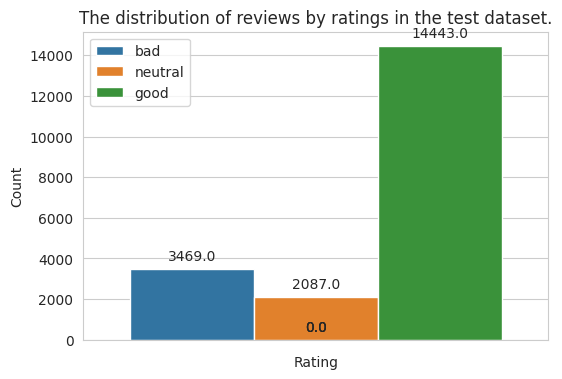

In [112]:
#Create a figure
plt.figure(1, figsize=(6,4))
#Set background
sns.set_style('whitegrid')
#create barplot of showing the distribution of reviews in the entire test dataset
ax = sns.barplot(hue=['bad', 'neutral', 'good'], y=[len(df[df['rating']==1]), len(df[df['rating']==2]), len(df[df['rating']==3])])

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center',
                  xytext=(0, 9),
                  textcoords='offset points')


#Create title for the figure
plt.title('The distribution of reviews by ratings in the test dataset.')
#Create xlabel
plt.xlabel('Rating')
#Create ylabel
plt.ylabel('Count')
#
plt.savefig('/content/drive/MyDrive/MSc Data Science & Artificial Intelligence/2nd Semester/CIS4515 Practical Data Analysis/CW2/test_dist.svg')
#Show the plot
plt.show()

- Based on the best voting classifier:

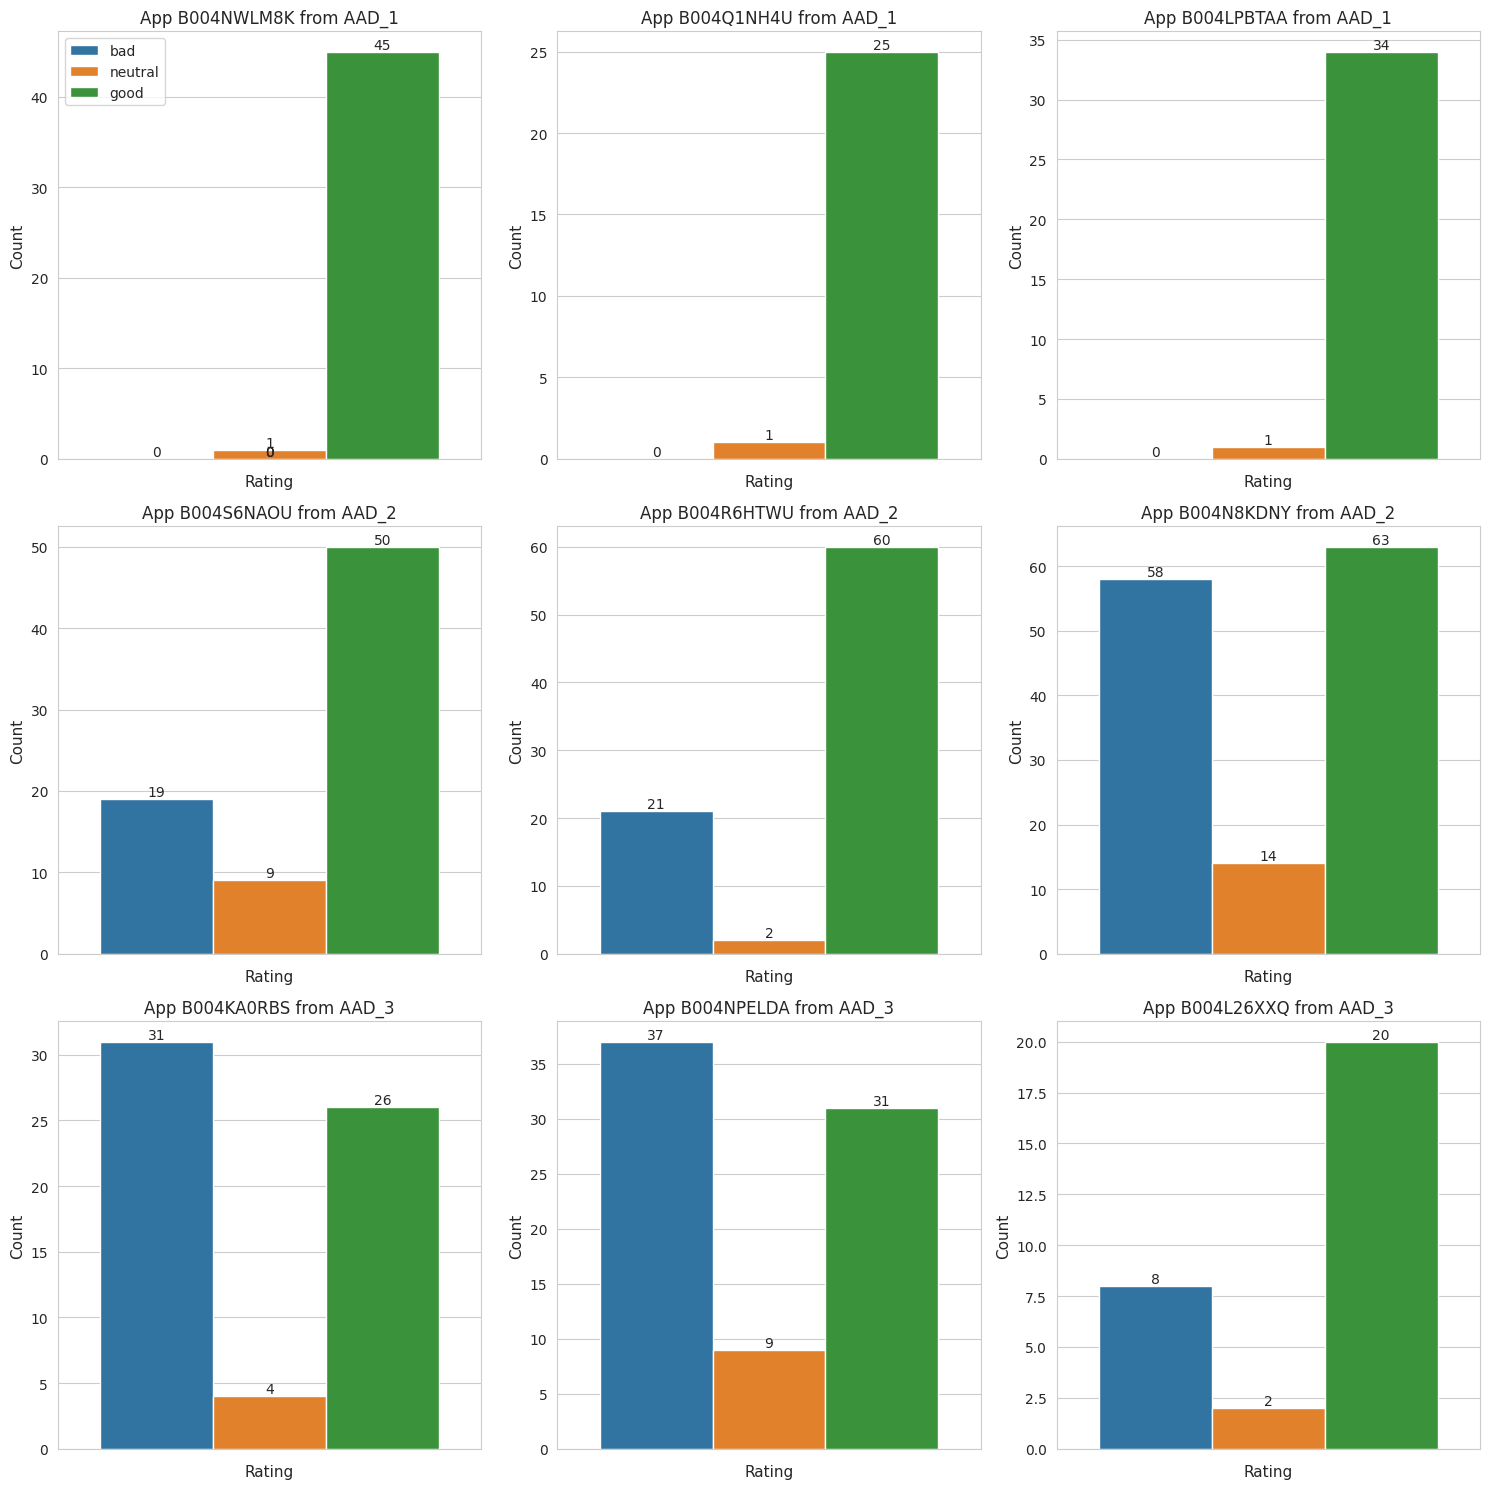

In [49]:
#Create a figure with 3x3 subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

#Plot 9 barplots showing the reviews of each of the 9 apps
sns.barplot(hue=['bad', 'neutral', 'good'], y=[len(AAD_1_1[AAD_1_1['VC_best_3']==1]), len(AAD_1_1[AAD_1_1['VC_best_3']==2]), len(AAD_1_1[AAD_1_1['VC_best_3']==3])], legend=True, ax=axs[0, 0])
sns.barplot(hue=['bad', 'neutral', 'good'], y=[len(AAD_1_2[AAD_1_2['VC_best_3']==1]), len(AAD_1_2[AAD_1_2['VC_best_3']==2]), len(AAD_1_2[AAD_1_2['VC_best_3']==3])], legend=False, ax=axs[0, 1])
sns.barplot(hue=['bad', 'neutral', 'good'], y=[len(AAD_1_3[AAD_1_3['VC_best_3']==1]), len(AAD_1_3[AAD_1_3['VC_best_3']==2]), len(AAD_1_3[AAD_1_3['VC_best_3']==3])], legend=False, ax=axs[0, 2])
sns.barplot(hue=['bad', 'neutral', 'good'], y=[len(AAD_2_1[AAD_2_1['VC_best_3']==1]), len(AAD_2_1[AAD_2_1['VC_best_3']==2]), len(AAD_2_1[AAD_2_1['VC_best_3']==3])], legend=False, ax=axs[1, 0])
sns.barplot(hue=['bad', 'neutral', 'good'], y=[len(AAD_2_2[AAD_2_2['VC_best_3']==1]), len(AAD_2_2[AAD_2_2['VC_best_3']==2]), len(AAD_2_2[AAD_2_2['VC_best_3']==3])], legend=False, ax=axs[1, 1])
sns.barplot(hue=['bad', 'neutral', 'good'], y=[len(AAD_2_3[AAD_2_3['VC_best_3']==1]), len(AAD_2_3[AAD_2_3['VC_best_3']==2]), len(AAD_2_3[AAD_2_3['VC_best_3']==3])], legend=False, ax=axs[1, 2])
sns.barplot(hue=['bad', 'neutral', 'good'], y=[len(AAD_3_1[AAD_3_1['VC_best_3']==1]), len(AAD_3_1[AAD_3_1['VC_best_3']==2]), len(AAD_3_1[AAD_3_1['VC_best_3']==3])], legend=False, ax=axs[2, 0])
sns.barplot(hue=['bad', 'neutral', 'good'], y=[len(AAD_3_2[AAD_3_2['VC_best_3']==1]), len(AAD_3_2[AAD_3_2['VC_best_3']==2]), len(AAD_3_2[AAD_3_2['VC_best_3']==3])], legend=False, ax=axs[2, 1])
sns.barplot(hue=['bad', 'neutral', 'good'], y=[len(AAD_3_3[AAD_3_3['VC_best_3']==1]), len(AAD_3_3[AAD_3_3['VC_best_3']==2]), len(AAD_3_3[AAD_3_3['VC_best_3']==3])], legend=False, ax=axs[2, 2])

#Add titles to each subplot
companies = apps.columns

#Loop through each plot setting title to mention the app and its respective company
for i in range(3):
  for j in range(3):
    axs[i,j].set_title(f'App {apps[companies[i]][j]} from {companies[i]}', size=12)
    axs[i,j].set_xlabel('Rating', size=11)
    axs[i,j].set_ylabel('Count', size=11)

#Loop through each plot setting the counts to display on each respective bar
for i in range(3):
  for j in range(3):
    for p in axs[i,j].patches:
      axs[i,j].text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.0f}',
                    ha='center', va='bottom')
#Adjust spacing between subplots
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/MSc Data Science & Artificial Intelligence/2nd Semester/CIS4515 Practical Data Analysis/CW2/Apps_Comps.svg')
#Show the plot
plt.show()

In [ ]:
# plot graphs based on percentage of reviews that are good for all reviews of an app

In [ ]:
# make an average percentage for each company

In [71]:
len(AAD_1_1[AAD_1_1['VC_best_3']==3])/(len(AAD_1_1['VC_best_3']))

0.9782608695652174

In [54]:
len(AAD_1_1['VC_best_3'])

46

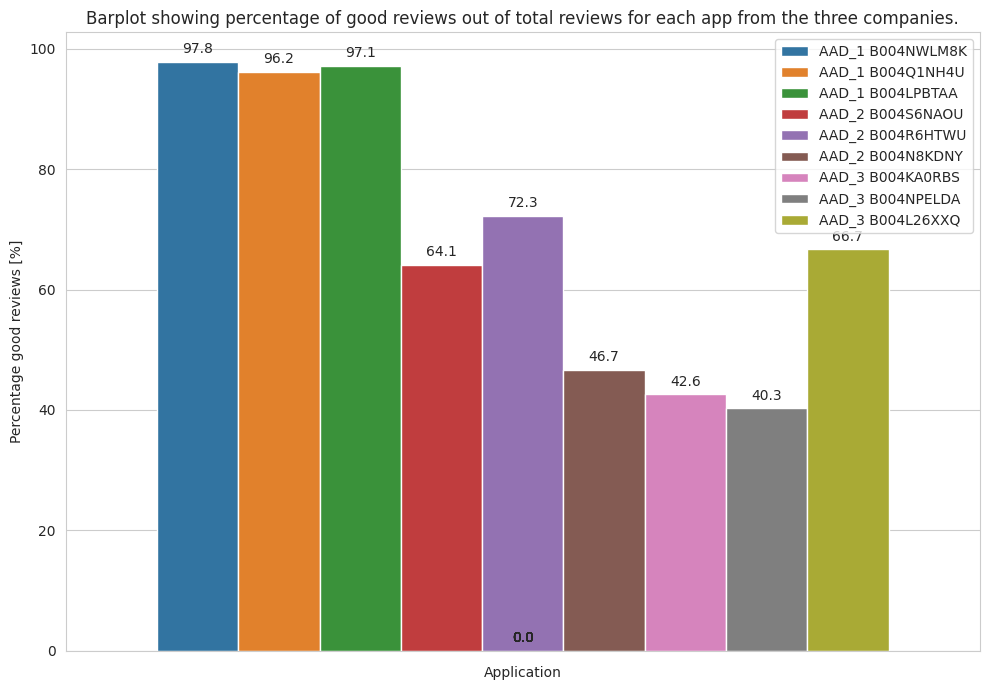

In [108]:
#Create a figure
plt.figure(2, figsize=(10, 7))

#Plot showing 9 bars of app good review percentage
ax = sns.barplot(hue= ['AAD_1 B004NWLM8K', 'AAD_1 B004Q1NH4U', 'AAD_1 B004LPBTAA', 'AAD_2 B004S6NAOU', 'AAD_2 B004R6HTWU', 'AAD_2 B004N8KDNY', 'AAD_3 B004KA0RBS', 'AAD_3 B004NPELDA', 'AAD_3 B004L26XXQ'], y=[len(AAD_1_1[AAD_1_1['VC_best_3']==3])*100/(len(AAD_1_1['VC_best_3'])),
                                               len(AAD_1_2[AAD_1_2['VC_best_3']==3])*100/(len(AAD_1_2['VC_best_3'])),
                                               len(AAD_1_3[AAD_1_3['VC_best_3']==3])*100/(len(AAD_1_3['VC_best_3'])),
                                               len(AAD_2_1[AAD_2_1['VC_best_3']==3])*100/(len(AAD_2_1['VC_best_3'])),
                                               len(AAD_2_2[AAD_2_2['VC_best_3']==3])*100/(len(AAD_2_2['VC_best_3'])),
                                               len(AAD_2_3[AAD_2_3['VC_best_3']==3])*100/(len(AAD_2_3['VC_best_3'])),
                                               len(AAD_3_1[AAD_3_1['VC_best_3']==3])*100/(len(AAD_3_1['VC_best_3'])),
                                               len(AAD_3_2[AAD_3_2['VC_best_3']==3])*100/(len(AAD_3_2['VC_best_3'])),
                                               len(AAD_3_3[AAD_3_3['VC_best_3']==3])*100/(len(AAD_3_3['VC_best_3']))], legend=True)


#Loop through each plot setting the counts to display on each respective bar
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center',
                  xytext=(0, 9),
                  textcoords='offset points')

plt.xlabel('Application')
plt.ylabel('Percentage good reviews [%]')
plt.title('Barplot showing percentage of good reviews out of total reviews for each app from the three companies.')
#Adjust spacing between subplots
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/MSc Data Science & Artificial Intelligence/2nd Semester/CIS4515 Practical Data Analysis/CW2/Apps_good%.svg')
#Show the plot
plt.show()

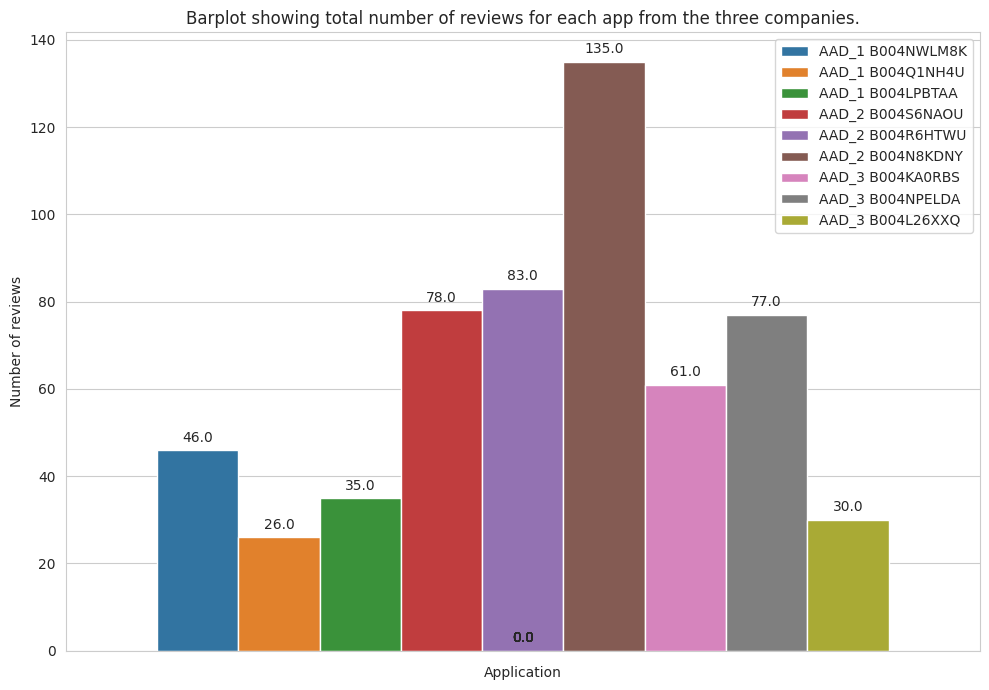

In [111]:
#Create a figure
plt.figure(2, figsize=(10, 7))

#Plot showing 9 bars of app good review percentage
ax = sns.barplot(hue= ['AAD_1 B004NWLM8K', 'AAD_1 B004Q1NH4U', 'AAD_1 B004LPBTAA', 'AAD_2 B004S6NAOU', 'AAD_2 B004R6HTWU', 'AAD_2 B004N8KDNY', 'AAD_3 B004KA0RBS', 'AAD_3 B004NPELDA', 'AAD_3 B004L26XXQ'], y=[(len(AAD_1_1['VC_best_3'])),
                                              (len(AAD_1_2['VC_best_3'])),
                                               (len(AAD_1_3['VC_best_3'])),
                                               (len(AAD_2_1['VC_best_3'])),
                                               (len(AAD_2_2['VC_best_3'])),
                                               (len(AAD_2_3['VC_best_3'])),
                                               (len(AAD_3_1['VC_best_3'])),
                                               (len(AAD_3_2['VC_best_3'])),
                                               (len(AAD_3_3['VC_best_3']))], legend=True)


#Loop through each plot setting the counts to display on each respective bar
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.1f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center',
                  xytext=(0, 9),
                  textcoords='offset points')

plt.xlabel('Application')
plt.ylabel('Number of reviews')
plt.title('Barplot showing total number of reviews for each app from the three companies.')
#Adjust spacing between subplots
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/MSc Data Science & Artificial Intelligence/2nd Semester/CIS4515 Practical Data Analysis/CW2/Apps_tot.svg')
#Show the plot
plt.show()

In [64]:
plt.figure(2, figsize=(10, 7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

In [102]:
list(apps['AAD_3'].values)

['B004KA0RBS', 'B004NPELDA', 'B004L26XXQ']